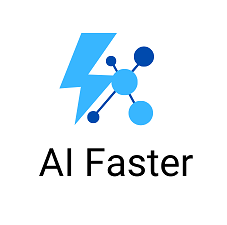
### Một bài tập để ôn lại kiến thức PLA (Perceptron learning algorithm)

**Viết một chương trình sử dụng PLA để phân loại hai lớp dữ liệu tuyến tính. Chương trình của bạn nên có các chức năng sau:**

> 1. Tạo dữ liệu mô phỏng: Hãy tạo ra một tập dữ liệu mô phỏng gồm hai lớp dữ liệu tuyến tính, mỗi lớp chứa một số điểm dữ liệu. Đảm bảo rằng các điểm dữ liệu trong hai lớp này có thể được phân loại bằng một đường thẳng mặt phẳng hoặc siêu phẳng tuyến tính.

> 2. Hiển thị dữ liệu: Vẽ đồ thị để hiển thị dữ liệu và biểu diễn các lớp dữ liệu bằng màu sắc khác nhau.

> 3. Huấn luyện PLA: Sử dụng PLA để tìm siêu phẳng tuyến tính (đối với bài này chỉ yêu cầu làm không gian 2 chiều) phân chia hai lớp dữ liệu. Bắt đầu bằng một siêu phẳng ngẫu nhiên và áp dụng thuật toán PLA để điều chỉnh siêu phẳng này cho đến khi tìm được siêu phẳng phân chia hai lớp dữ liệu.

> 4. Hiển thị kết quả: Vẽ đồ thị để hiển thị siêu phẳng phân chia hai lớp dữ liệu và các điểm dữ liệu đã được phân loại.

*Thật tuyệt vời nếu bạn hoàn thành nó trước 21h ngày mai*

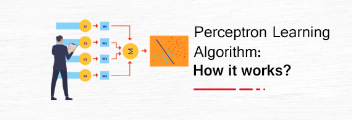
> **Bài làm**

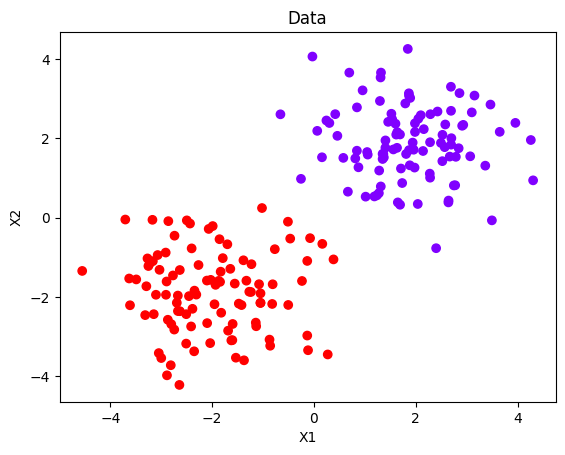

3
[[-0.59865394]
 [-1.11589699]
 [ 0.76666318]]
[[-0.59865394]
 [-1.82722719]
 [-2.21491251]]
200
(200, 1)


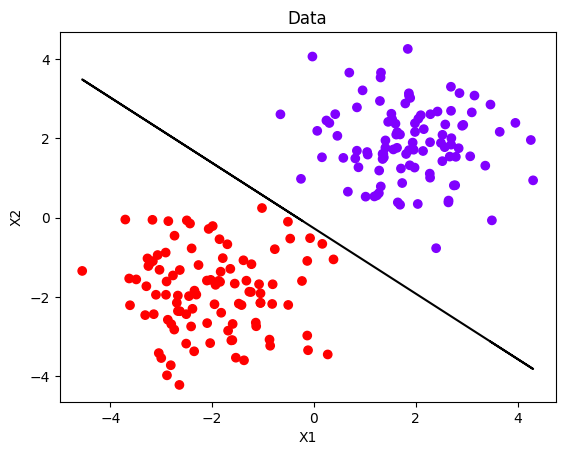

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples):
    np.random.seed(0)
    mean1 = [-2, -2]
    mean2 = [2, 2]
    cov = [[1, 0], [0, 1]]
    X1 = np.random.multivariate_normal(mean1, cov, n_samples)
    X2 = np.random.multivariate_normal(mean2, cov, n_samples)
    y1 = np.ones(n_samples)
    y2 = -np.ones(n_samples)
    X = np.concatenate((X1, X2), axis=0)
    y = np.concatenate((y1, y2), axis=0)
    return X, y

def plot_data(X, y):
    plt.scatter(X[0, :], X[1, :], c=y, cmap='rainbow')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Data')
    plt.show()

def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):    
    return np.array_equal(h(w, X), y) 

def perceptron(X, y, w_init):
    w = [w_init]
    # print(w)
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[:,i]
            if h(w[-1], xi)[0] != yi: # misclassified point
                mis_points.append(i)
                w_new = w[-1] + yi*xi 
                w.append(w_new)
                # print(w[-1].shape)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)



def plot_decision_boundary(X, y, w):
    data = []
    N = X.shape[1]
    print(N)
    for i in range( N):
        temp = -(w[-1][0]+w[-1][1]*X[1][i])/w[-1][2]
        data.append(temp)
    data = np.array(data)
    print(data.shape)    
    plt.plot(X[1, :], data[:, 0], 'black', label='y = wx') 
    plt.scatter(X[1, :], X[2, :], c=y, cmap='rainbow')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Data')
    plt.show()






# 1. Tạo dữ liệu mô phỏng
n_samples = 100
X, y = generate_data(n_samples)
X = X.T
y = y.reshape(1,-1)
# 2. Hiển thị dữ liệu
plot_data(X, y)

X_bar = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

# print(X[:5,:].T)

# print(y.shape)
# # 3. Huấn luyện PLA
d = X_bar.shape[0]
print(d)
w_init = np.random.randn(d, 1)
print(w_init)
(w, m) = perceptron(X_bar, y, w_init)
print(w[-1])

# 4. Hiển thị kết quả
plot_decision_boundary(X_bar, y, w)

# print(X_bar.T)
# print(X_bar[1][1])
